# Setup

In [36]:
import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

import sys
sys.path.append('D:\\repos\\custom_packages')
import dataviz as dv

# Read from GWV target files

## Path definition

In [38]:
model_cwd = 'D:/MAURICE/MAURICE Model/MAU_v2/MAU_v2_transient/MAU_v3'
model_name = 'M3'
date_start = datetime.datetime(2023,9,3)

## Visualization

In [ ]:
# Read
target_results = pd.read_csv(os.path.join(model_cwd, f'{model_name}_headtarget_resids.csv'))

# Obtain field "date"
dates = [date_start + datetime.timedelta(0, t) for t in target_results.Time]
target_results['Date'] = dates

# Sort from North to South
df_plot = target_results.sort_values('Y', ascending=False).copy()

In [ ]:
print('Number of head target points: ', len(target_results.Name.unique()))

Number of head target points:  49


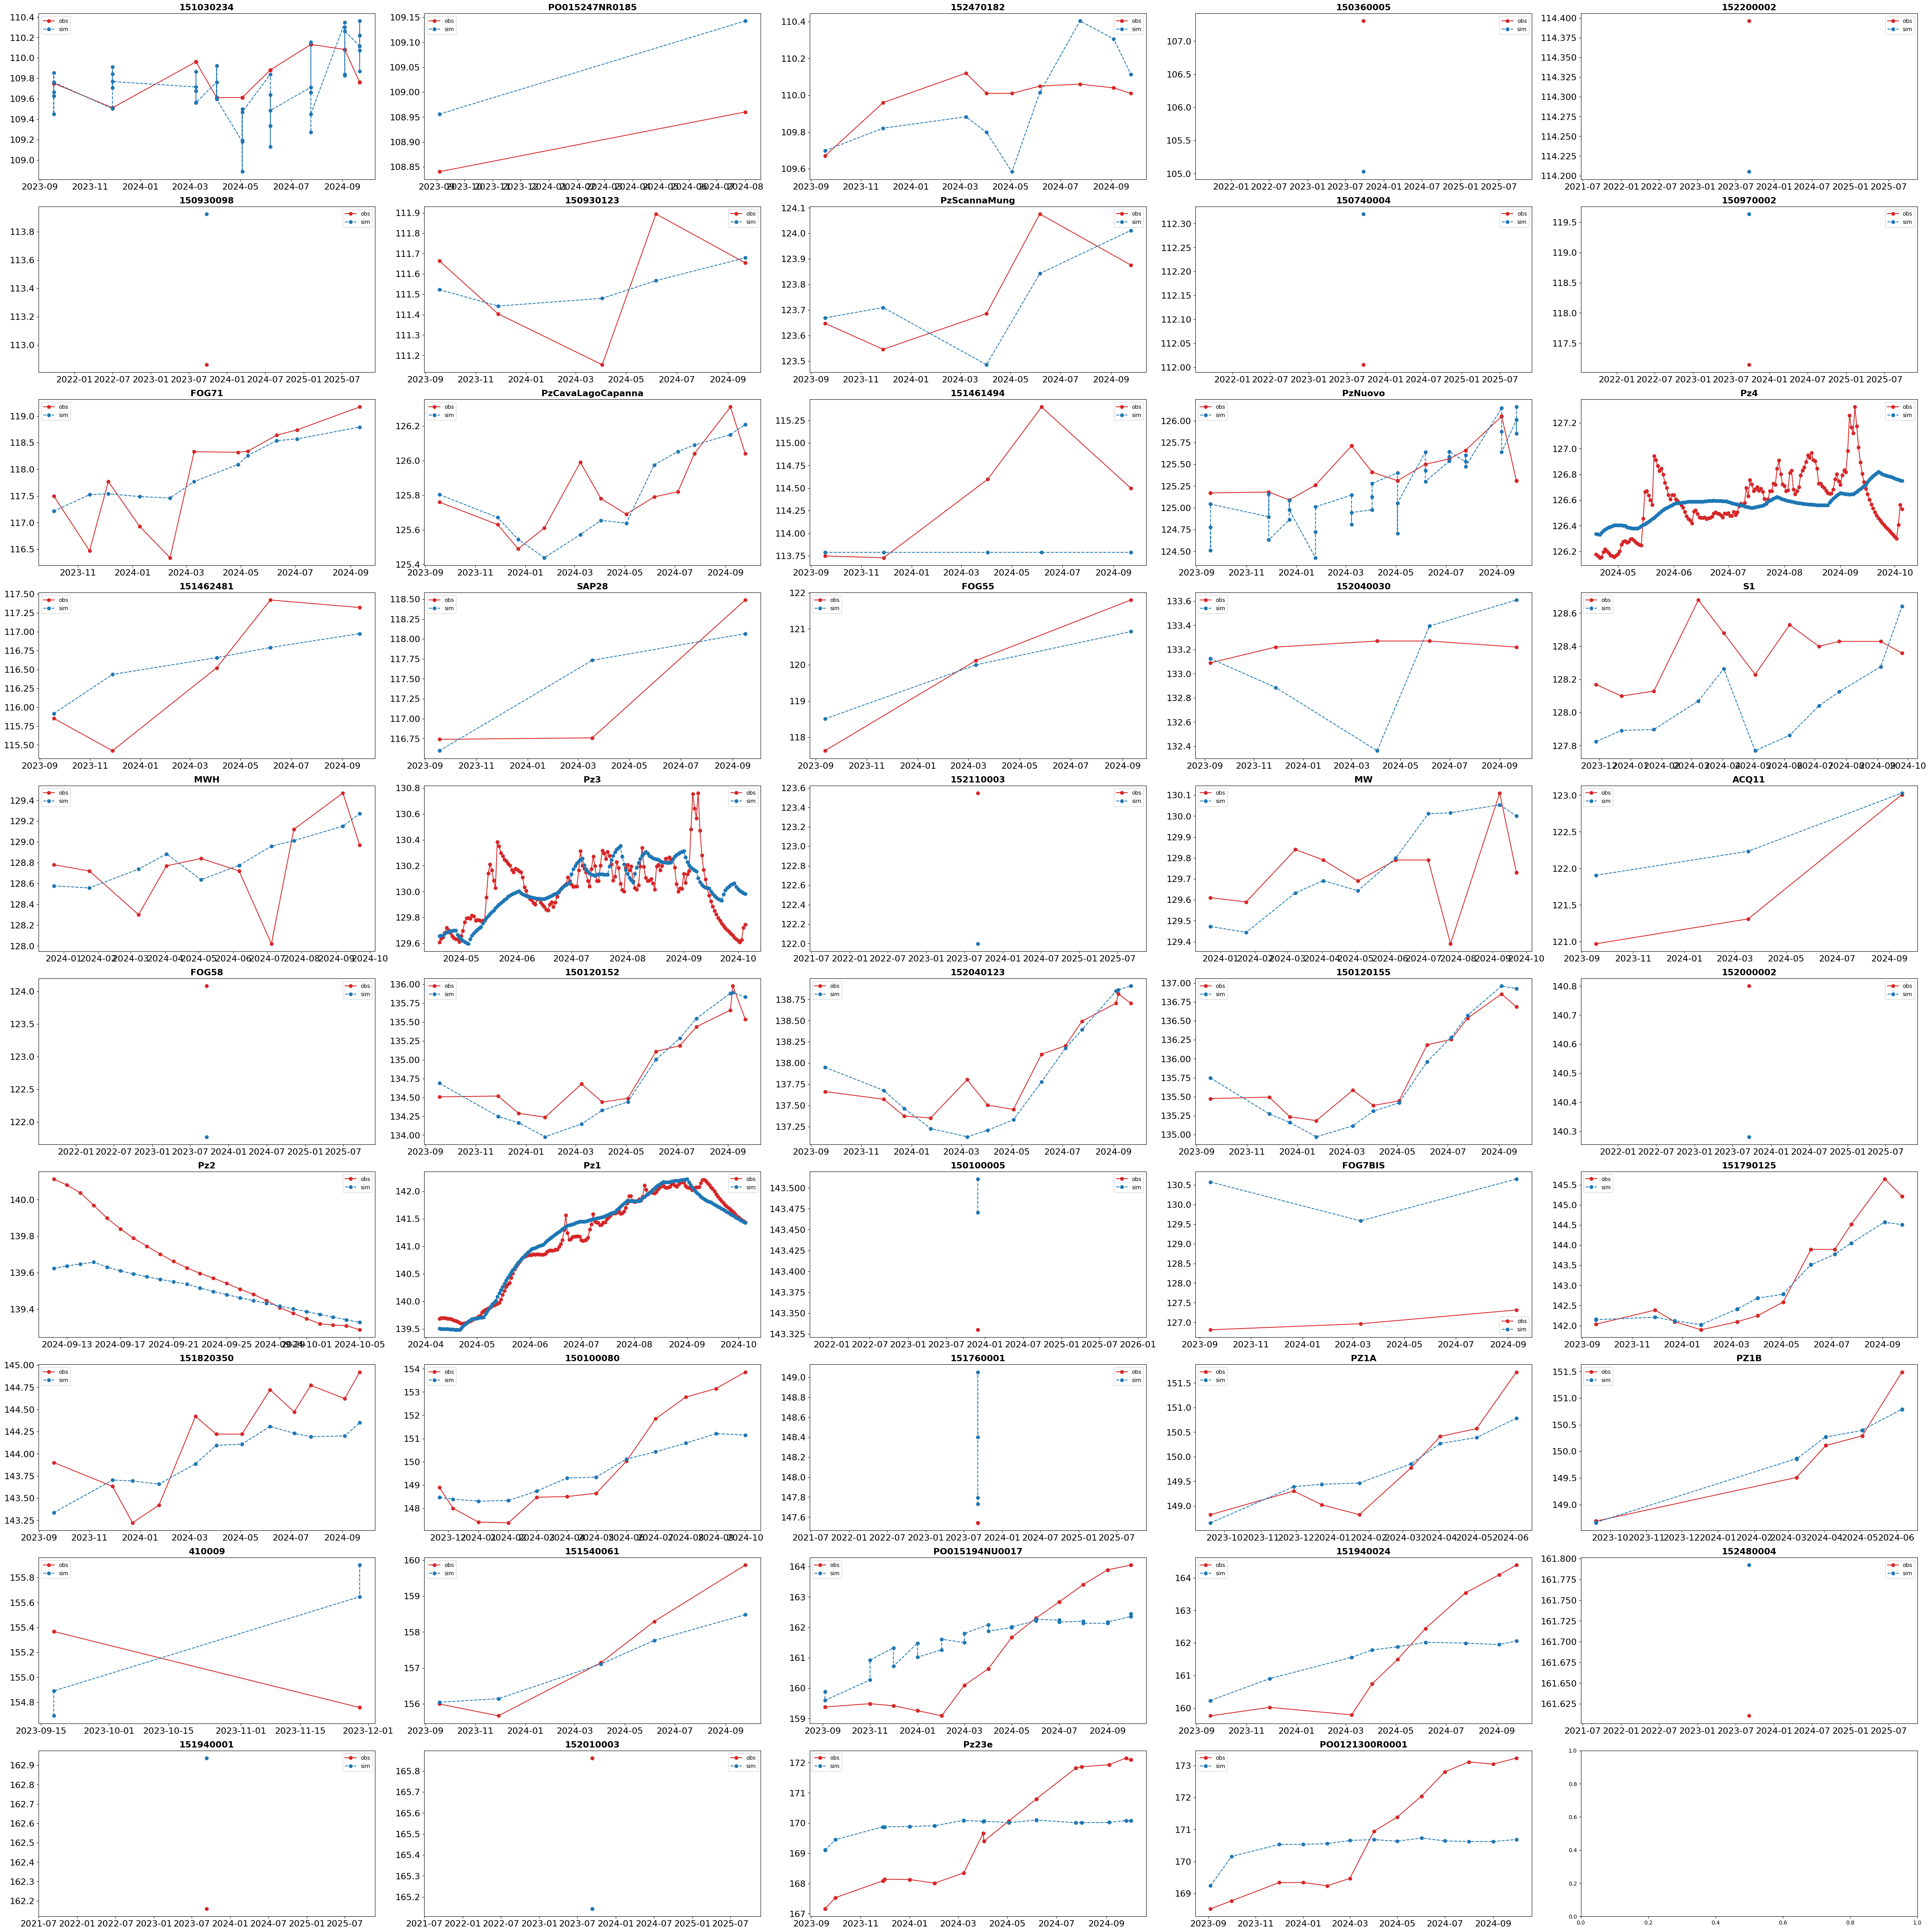

In [58]:
# Visualize subplots
fig, axes = plt.subplots(10, 5, figsize = dv.cm2inch(5*10*2.5, 5*10*2.5))

i = 0
for ax in axes.flatten():
    if i < len(df_plot.Name.unique()):
        tool = df_plot.loc[df_plot.Name == df_plot.Name.unique()[i], :].sort_values('Time').copy()
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Observed'],
                marker = 'o', linestyle = '-', color = 'tab:red', label = 'obs')
        ax.plot(tool.loc[:, 'Date'],
                tool.loc[:, 'Simulated'],
                marker = 'o', linestyle = '--', color = 'tab:blue', label = 'sim')
        ax.legend()
        ax.set_title(df_plot.Name.unique()[i], fontweight = 'bold', ha = 'center', fontsize = 16)
        ax.tick_params(axis='both', which='major', labelsize=16)
    i += 1

# settare visualizzazione come YY-MM

fig.tight_layout()